In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
def Kernel(point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye((m)))
    for j in range(m):
        diff=point-X[j]
        weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
    return weights

In [38]:
def LocalWeight(point,xmat,ymat,k):
    w=Kernel(point,xmat,k)
    W=(X.T*(w*X)).I*(X.T*(w*ymat.T))
    return W

In [39]:
def LWRegression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*LocalWeight(xmat[i],xmat,ymat,k)
    return ypred

In [40]:
data=pd.read_csv('dataset.csv')
total=np.array(data.total_bill)
tip=np.array(data.tip)

In [41]:
mtotal=np.mat(total)
mtip=np.mat(tip)

In [42]:
m=np.shape(mtotal)[1]
one_mat=np.mat(np.ones(m))
X=np.hstack((one_mat.T,mtotal.T))

In [43]:
ypred=LWRegression(X,mtip,0.5)
sort=X[:,1].argsort(0)
xsort=X[sort][:,0]

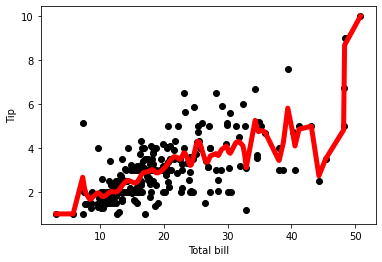

In [44]:
plot=plt.figure()
ax=plot.add_subplot(1,1,1)
ax.scatter(total,tip,color='black')
ax.plot(xsort[:,1],ypred[sort],color='red',linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()